In [10]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import matplotlib as plt

In [11]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [12]:

train_data = train_datagen.flow_from_directory(
    r"C:\Users\Krish Sharma\Desktop\programming\python\AI Course Udemy\Neural Networks\ANN Project Implementation\Brain Tumour Detection Using Cnn\archive (1)\Brain Tumor Data(1)\Brain Tumor Data\Brain Tumor data\Brain Tumor data\Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    r"C:\Users\Krish Sharma\Desktop\programming\python\AI Course Udemy\Neural Networks\ANN Project Implementation\Brain Tumour Detection Using Cnn\archive (1)\Brain Tumor Data(1)\Brain Tumor Data\Brain Tumor data\Brain Tumor data\Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
print(train_data.class_indices)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10
179/179 [==============================] - 293s 2s/step - loss: 0.8730 - accuracy: 0.6411 - val_loss: 0.9187 - val_accuracy: 0.6995
Epoch 2/10
179/179 [==============================] - 279s 2s/step - loss: 0.5509 - accuracy: 0.7866 - val_loss: 0.4926 - val_accuracy: 0.7941
Epoch 3/10
179/179 [==============================] - 183s 1s/step - loss: 0.4671 - accuracy: 0.8193 - val_loss: 0.4161 - val_accuracy: 0.8261
Epoch 4/10
179/179 [==============================] - 185s 1s/step - loss: 0.4411 - accuracy: 0.8304 - val_loss: 0.5835 - val_accuracy: 0.7674
Epoch 5/10
179/179 [==============================] - 174s 972ms/step - loss: 0.3784 - accuracy: 0.8552 - val_loss: 0.3752 - val_accuracy: 0.8413
Epoch 6/10
179/179 [==============================] - 1233s 7s/step - loss: 0.3462 - accuracy: 0.8713 - val_loss: 0.6171 - val_accuracy: 0.7872
Epoch 7/10
179/179 [==============================] - 170s 947ms/step - loss: 0.3307 - accuracy: 0.8741 - val_loss: 0.3575 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


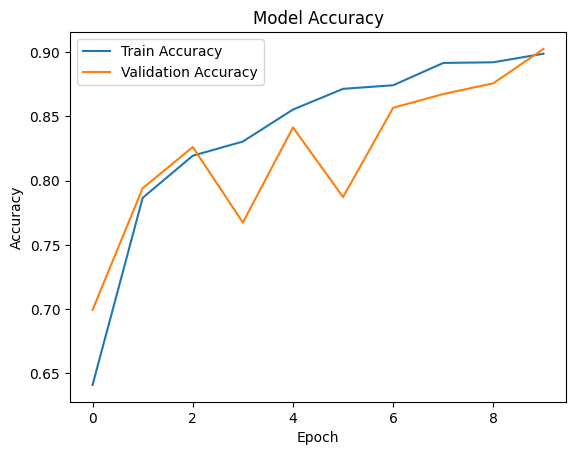

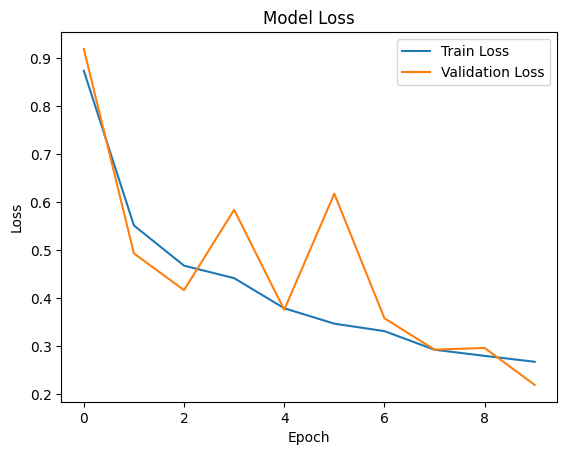

In [21]:
import matplotlib.pyplot as plt

# Print history keys for debugging
print(history.history.keys())

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [22]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


41/41 [==============================] - 8s 195ms/step - loss: 0.2186 - accuracy: 0.9024
Test Accuracy: 90.24%


In [23]:
model.save("brain_model.h5")
